In [24]:
#!pip install plotnine

In [30]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_smooth, labs
import numpy as np

## Rotten Tomatoes MoviesThe dataset "movieratings.csv" contains critic ratings (Tomato Meter) and audience ratings (Audience) for 200 random movies found in the Rotten Tomato movie database. Our goals are to:1. understand the relationship between critic and audience scores, 2. fit a (linear) model to summarize this relationship, and3. use it to predict audience ratings for movies which have evaluated by critics. Let's look at the first couple of movies: 

In [32]:
# Read CSV file
ratings = pd.read_csv("~/Desktop/repos/math372/data/movieratings.csv")

# Display the first few rows
print(ratings.head())

   movie_id    movie_title  tomatometer_rating  audience_rating
0     17401   Willow Creek                81.0             34.0
1      4775        Colonia                26.0             61.0
2     13218  She's the Man                43.0             79.0
3     10539         Mongol                86.0             76.0
4      8462           I.Q.                44.0             47.0


In [34]:
# Summary statistics for critic ratings
print(ratings['tomatometer_rating'].describe())

count    198.000000
mean      60.742424
std       27.065990
min        0.000000
25%       39.250000
50%       64.500000
75%       86.000000
max      100.000000
Name: tomatometer_rating, dtype: float64


In [36]:
# Summary statistics for audience ratings
print(ratings['audience_rating'].describe())

count    199.000000
mean      61.608040
std       19.118639
min       13.000000
25%       47.000000
50%       64.000000
75%       77.500000
max       94.000000
Name: audience_rating, dtype: float64


Let's try to plot critic rating (predictor, on the x-axis) vs. audience rating (response, on the y-axis) for each of our movies. 

In this course, we'll use ggplot for visualization. We'll learn ggplot syntax as we go on an as-needed basis.

/opt/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


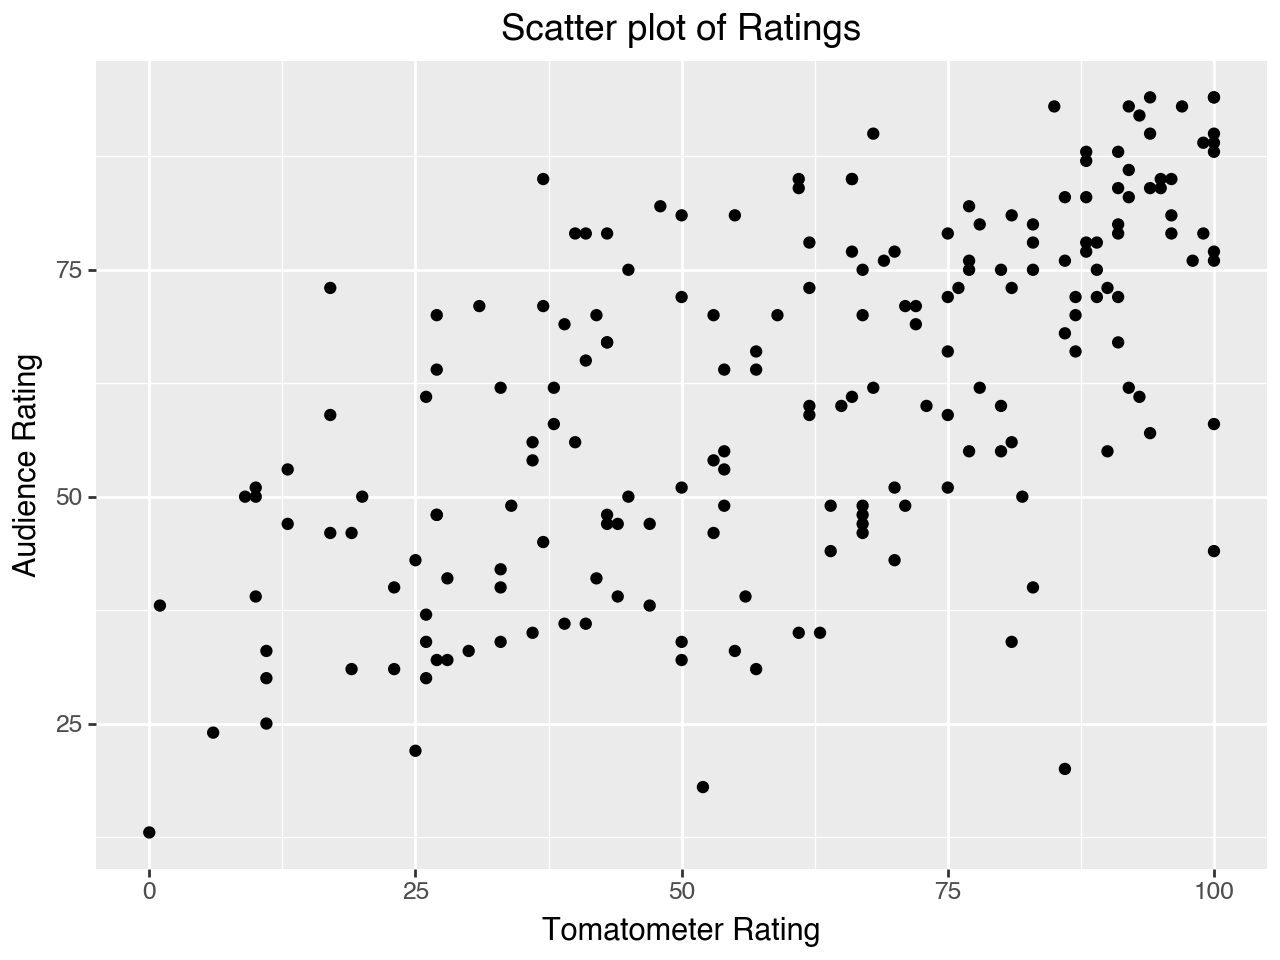

In [39]:
# Scatter plot
plot1 = (
    ggplot(ratings, aes(x='tomatometer_rating', y='audience_rating')) + #define dataframe, x var & y var
    geom_point() + #type of plot: scatterplot
    labs(title='Scatter plot of Ratings', x='Tomatometer Rating', y='Audience Rating') #label x and y axes in words
)
plot1.show()

In [41]:
# Identifying complete cases
complete_index = ratings.notnull().all(axis=1) #not null entries in all columns (axis = 1)

In [43]:
complete_index

0      True
1      True
2      True
3      True
4      True
       ... 
195    True
196    True
197    True
198    True
199    True
Length: 200, dtype: bool

In [45]:
print(complete_index.describe()) #summary

count      200
unique       2
top       True
freq       197
dtype: object


In [47]:
# Movies with missing data
print(ratings[~complete_index]) #~ is a negation operator  – switches True to False and vice versa

     movie_id                          movie_title  tomatometer_rating  \
45       9326  Le Deuxième souffle (Second Breath)                 NaN   
52      15191                             The Hunt                83.0   
103     17532   The World, the Flesh and the Devil                 NaN   

     audience_rating  
45              67.0  
52               NaN  
103             67.0  


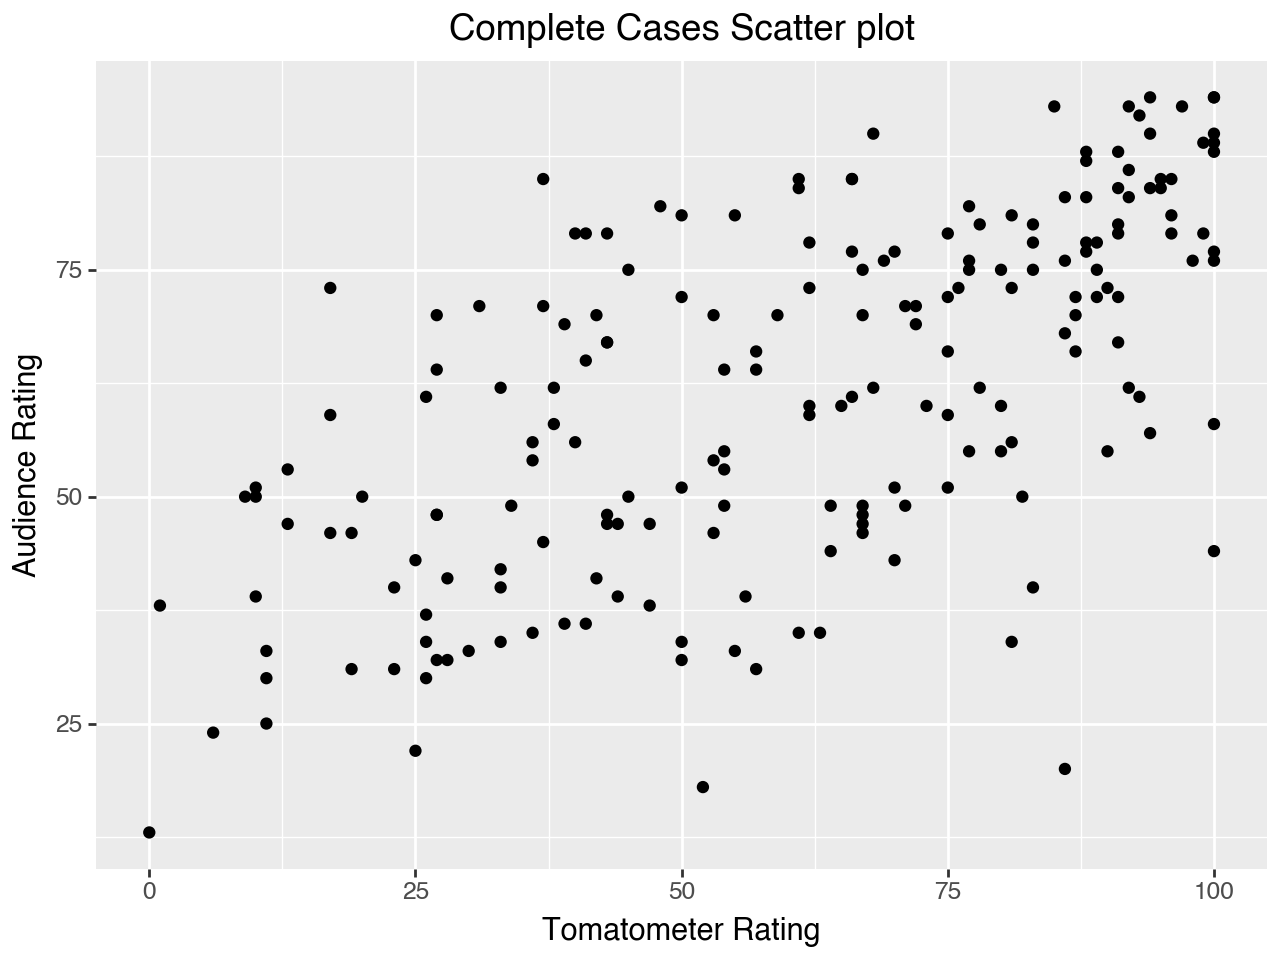

In [49]:
# Complete cases
ratings_complete = ratings[complete_index].copy() #use copy to allow changes to DataFrame later on

# Scatter plot for complete cases
plot2 = (
    ggplot(ratings_complete, aes(x='tomatometer_rating', y='audience_rating')) +
    geom_point() +
    labs(title='Complete Cases Scatter plot', x='Tomatometer Rating', y='Audience Rating')
)
plot2.show()

In [51]:
# Correlation
correlation = ratings_complete['tomatometer_rating'].corr(ratings_complete['audience_rating'])
print("Correlation:", correlation)

Correlation: 0.6290515914605515


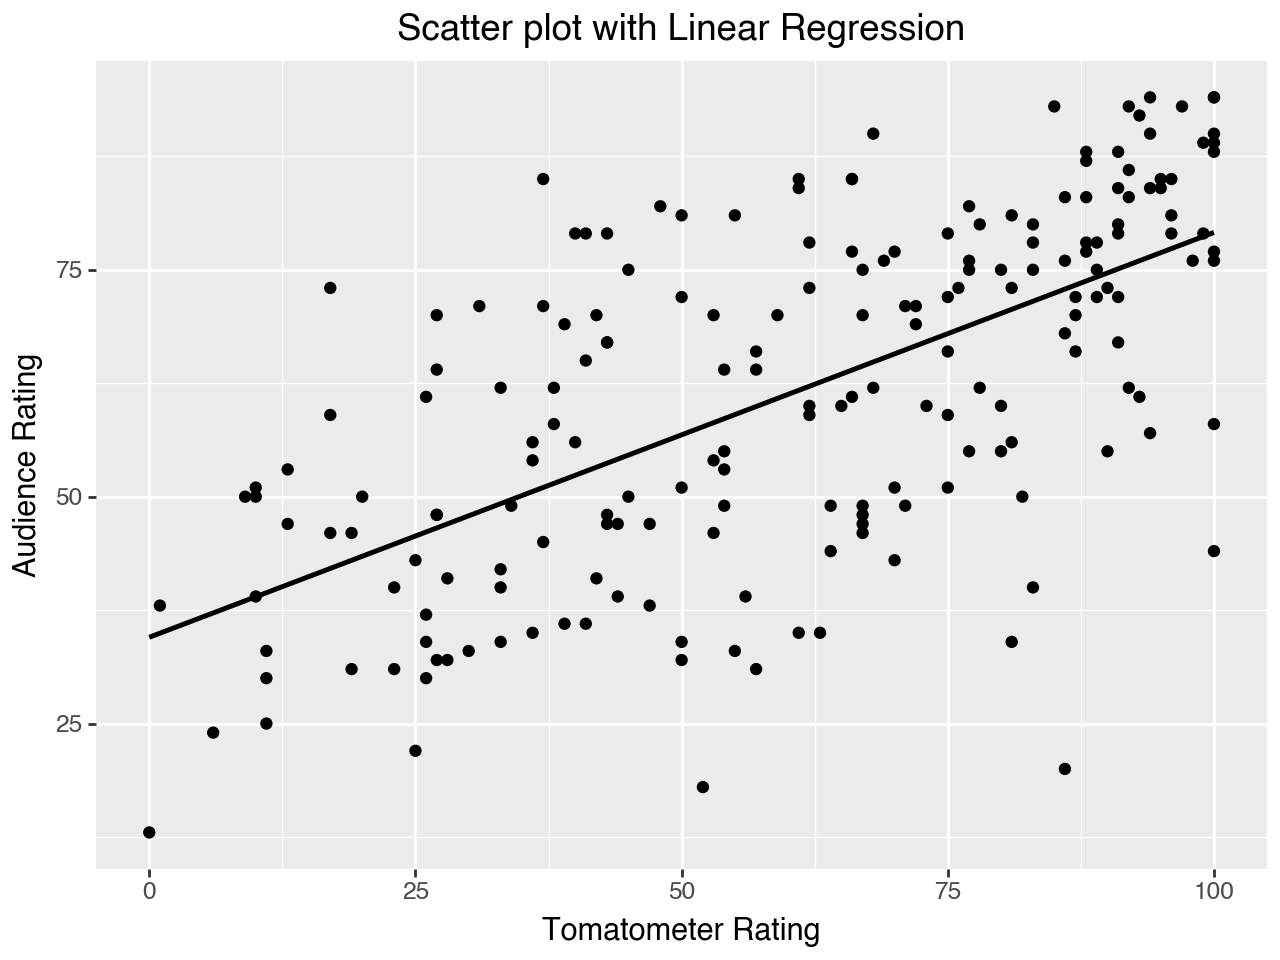

In [53]:
# Scatter plot with linear regression line
plot3 = (
    ggplot(ratings_complete, aes(x='tomatometer_rating', y='audience_rating')) +
    geom_point() +
    geom_smooth(method='lm', formula='y ~ x', se=False) +
    labs(title='Scatter plot with Linear Regression', x='Tomatometer Rating', y='Audience Rating')
)
plot3.show()

The black line represents the fitted regression line:

$\hat{y}_i = 35.5089 + 0.4461 x_i$

or

$\widehat{audience\_rating}_i = 35.5089 + 0.4461 * tomatometer\_rating_i$ 

**Interpretations:**

Slope: For every unit increase in [x-variable], we expect [y-variable] to increase by $\hat{\beta}_1$ [y-units] on average.

Intercept: For an observation where [x-variable] is zero, we expect its [y-variable] to be $\hat{\beta}_0$ on average.

(Example: https://www.forbes.com/sites/paultassi/2024/08/10/the-borderlands-movie-debuts-with-a-0-on-rotten-tomatoes/ ) 

Y-hat: For an observation where [x-variable] is x_i, we predict its [y-variable] to be $\hat{\beta}_0 + \hat{\beta}_1 x_i$.

(Watch out for nonsense interpretations.) 


## How do I get that line???

** go to written notes **

### Linear regression in Python 

You can use `Scikit-learn` or `statsmodels` to do linear regression
- `Scikit-learn` focus more on predictions, not much on inferences
- `statsmodels` is closer to the functions defined in R, has more inferences
- we are going to introduce `sklearn.linear_model`, `statsmodels.api.OLS` and `statsmodels.formula.api.ols` (most common). You are not limited to what I have introduced in class.  


#### 1. Scikit-learn

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
# Fit linear model
X = ratings_complete[['tomatometer_rating']]
y = ratings_complete['audience_rating']
model = LinearRegression().fit(X, y)

In [42]:
# Linear model summary
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}, Intercept: {intercept}")

Slope: 0.44605969701684284, Intercept: 34.508949131120964


This corresponds to the fitted regression line:

$\hat{y}_i = 35.5089 + 0.4461 x_i$

or

$\widehat{audience\_rating}_i = 35.5089 + 0.4461 * tomatometer\_rating_i$ 


In [44]:
# Predicted values and residuals -- add to DataFrame
ratings_complete.loc[:, 'predicted'] = model.predict(X)
ratings_complete.loc[:, 'residuals'] = ratings_complete['audience_rating'] - ratings_complete['predicted']

In [45]:
ratings_complete.head()

,movie_id,movie_title,tomatometer_rating,audience_rating,predicted,residuals
0,17401,Willow Creek,81.0,34.0,70.639785,-36.639785
1,4775,Colonia,26.0,61.0,46.106501,14.893499
2,13218,She's the Man,43.0,79.0,53.689516,25.310484
3,10539,Mongol,86.0,76.0,72.870083,3.129917
4,8462,I.Q.,44.0,47.0,54.135576,-7.135576


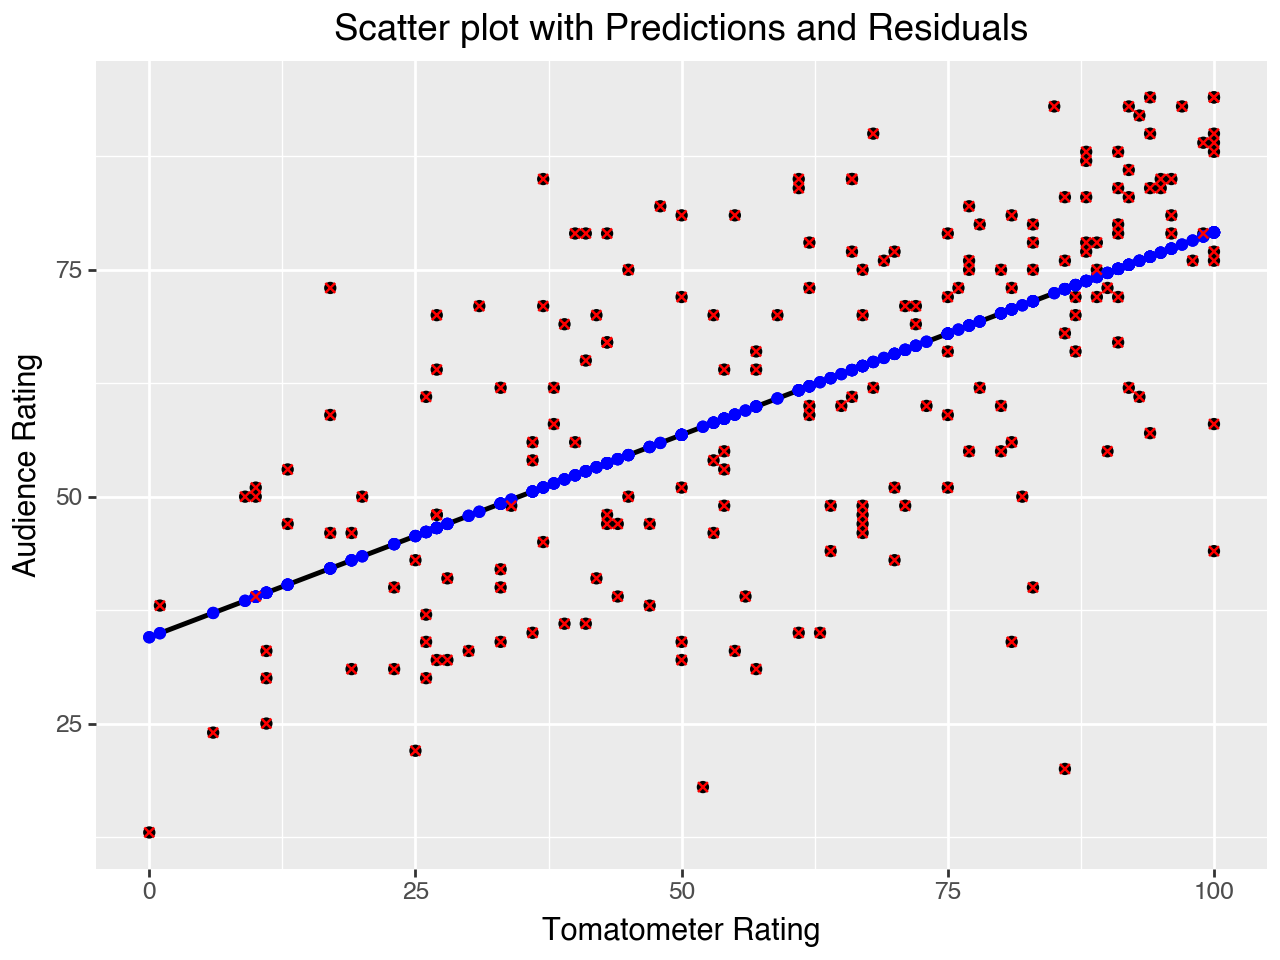

In [51]:
# Scatter plot with predicted values and residuals
plot4 = (
    ggplot(ratings_complete, aes(x='tomatometer_rating', y='audience_rating')) +
    geom_point() +
    geom_smooth(method='lm', formula='y ~ x', se=False) +
    geom_point(aes(y='predicted'), shape='o', color='blue') +
    labs(title='Scatter plot with Predictions and Residuals', x='Tomatometer Rating', y='Audience Rating') +
    geom_point(aes(y='predicted'), shape='o', color='blue') +
    geom_point(aes(y='audience_rating'), shape='x', color='red')
)
plot4.show()

In [53]:
# Prediction for a new data point
tomatometer_rating = 88
predicted_audience_rating = intercept + slope * tomatometer_rating
print(f"Predicted audience rating for tomatometer rating of {tomatometer_rating}: {predicted_audience_rating}")

# Alternative prediction using the model
barbie = pd.DataFrame({'tomatometer_rating': [88]})
pred = model.predict(barbie)
print("Predicted audience rating for 'Barbie':", pred[0])


Predicted audience rating for tomatometer rating of 88: 73.76220246860314
Predicted audience rating for 'Barbie': 73.76220246860314


#### 2. Use `statsmodels.api.OLS` to fit the data and check inference results

In [56]:
import statsmodels.api as sm

model_noint = sm.OLS(ratings_complete.audience_rating, ratings_complete.tomatometer_rating).fit() 
model_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        audience_rating   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              1747.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):                    1.38e-99
Time:                        16:27:28   Log-Likelihood:                         -874.29
No. Observations:                 197   AIC:                                      1751.
Df Residuals:                     196   BIC:                                      1754.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
tomatometer_rating     0.9209      0.022     41.802      0.000       0.877       0.964
==============================================================================
Omnibus:                        0.452   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.193
Skew:                          -0.001   Prob(JB):                        0.908
Kurtosis:                       3.153   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Hmm... 
But wait... there's only a slope, no intercept. This is a problem. 


To fix this in statsmodels, add an intercept to the predictor matrix:

In [59]:
predictor = ratings_complete[['tomatometer_rating']]
X = sm.add_constant(predictor)

In [61]:
X

,const,tomatometer_rating
0,1.0,81.0
1,1.0,26.0
2,1.0,43.0
3,1.0,86.0
4,1.0,44.0
...,...,...
195,1.0,95.0
196,1.0,81.0
197,1.0,91.0
198,1.0,28.0


In [63]:
model_int = sm.OLS(ratings_complete.audience_rating, X).fit() 
model_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        audience_rating   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           4.23e-23
Time:                        16:27:30   Log-Likelihood:                -811.62
No. Observations:                 197   AIC:                             1627.
Df Residuals:                     195   BIC:                             1634.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 34.5089      2.620     13.170      0.000      29.341      39.677
tomatometer_rating     0.4461      0.039     11.300      0.000       0.368       0.524
==============================================================================
Omnibus:                        5.349   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.192
Skew:                          -0.397   Prob(JB):                       0.0746
Kurtosis:                       3.057   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now the fitted model is the same:

$\hat{y}_i = 35.5089 + 0.4461 x_i$

or

$\widehat{audience\_rating}_i = 35.5089 + 0.4461 * tomatometer\_rating_i$ 


#### 3. R style: `statsmodels.formula.api.ols`

In [67]:
import statsmodels.formula.api as smf

model = smf.ols('audience_rating ~ tomatometer_rating',ratings_complete).fit() #formula: 'y~x' or 'y~x1+x2+x3..'
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        audience_rating   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           4.23e-23
Time:                        16:27:31   Log-Likelihood:                -811.62
No. Observations:                 197   AIC:                             1627.
Df Residuals:                     195   BIC:                             1634.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             34.5089      2.620     13.170      0.000      29.341      39.677
tomatometer_rating     0.4461      0.039     11.300      0.000       0.368       0.524
==============================================================================
Omnibus:                        5.349   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.192
Skew:                          -0.397   Prob(JB):                       0.0746
Kurtosis:                       3.057   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Output

- Covariance type is typically nonrobust which means there is no elimination of data to calculate the covariance between features.
- std err of tomatometer_rating: the estimated standard error of $\hat{\beta}_1$:

$Var(\hat{\beta}_1) = \frac{\sigma^2}{SSX}$

estimate $\sigma^2$ with $MSE=\frac{\sum(y_i-\hat{y}_i)^2}{n-2}$

estimate the standard deviation of $\hat{\beta}_1$ with $\sqrt
{\frac{MSE}{SSX}}$

$se(\hat{\beta}_1) =\sqrt{ \frac{MSE}{SSX}}$

In [70]:
#extract MSE

model.mse_resid

224.09918145536403

In [72]:
#Find Sxx = sum(Xi-X_bar)^2

SSX=np.sum((ratings_complete.tomatometer_rating-np.mean(ratings_complete.tomatometer_rating))**2) #sum(Xi-X_bar)^2
SSX

143817.9492385787

In [74]:
#calculate se

se_beta_1 = np.sqrt(model.mse_resid/SSX)
se_beta_1

0.03947422291390178

In [76]:
print(model.params)

Intercept             34.508949
tomatometer_rating     0.446060
dtype: float64


In [78]:
t = model.params.iloc[1]/se_beta_1
t

11.300024777935604

<b>Omnibus/Prob(Omnibus)</b> - a test of the skewness and kurtosis of the residual. We hope to see a value close to zero which would indicate normalcy. The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something close to 1 here.

<b>Skew</b> - a measure of data symmetry. We want to see something close to zero, indicating the residual distribution is normal. Note that this value also drives the Omnibus. https://en.wikipedia.org/wiki/Skewness

<b>Kurtosis</b> - a measure of "peakedness", or curvature of the data. Higher peaks lead to greater Kurtosis. A standard normal distribution has kurtosis of 3 and is recognized as mesokurtic. An increased kurtosis (>3) can be visualized as a thin “bell” with a high peak whereas a decreased kurtosis corresponds to a broadening of the peak and “thickening” of the tails. https://en.wikipedia.org/wiki/Kurtosis

<b>Durbin-Watson</b> - tests for homoscedasticity. We hope to have a value between 1 and 2 to indicate uncorrelated residuals.https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic

<b>Jarque-Bera (JB)/Prob(JB)</b> - like the Omnibus test in that it tests both skew and kurtosis for normality. We hope to see in this test a confirmation of the Omnibus test. https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test

<b>Condition Number</b> - This is a somewhat complicated mathematical concept (https://en.wikipedia.org/wiki/Condition_number#:~:text=In%20linear%20regression%20the%20condition,a%20relative%20change%20in%20input.) to test for multicollinearity (later).  This does not apply to SLR. we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something below 30. 


### ANOVA and F-test

In [87]:
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

# we will explain the 'typ' later in MLR. Itdoesn't matter in SLR

,df,sum_sq,mean_sq,F,PR(>F)
tomatometer_rating,1.0,28615.349972,28615.349972,127.69056,4.227557e-23
Residual,195.0,43699.340384,224.099181,NaN,NaN


#### Fitted values, Predictions and Confidence/Prediction Intervals

In [90]:
fitted = model.predict(ratings_complete.tomatometer_rating)
fitted

0      70.639785
1      46.106501
2      53.689516
3      72.870083
4      54.135576
         ...    
195    76.884620
196    70.639785
197    75.100382
198    46.998621
199    75.992501
Length: 197, dtype: float64

#### Confidence/Prediction Intervals... e.g. for Barbie

In [93]:
prediction=model.get_prediction(exog=dict(tomatometer_rating=barbie.tomatometer_rating))
prediction.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,73.762202,1.518187,70.768028,76.756377,44.086981,103.437424


#### Practice: credit

The Credit Card Balance Data is a data frame with 400 observations on:
This is a data frame with 400 observations on the following variables:

- ID - Identification
- Income - Income in \$10,000
- Limit - Credit limit
- Rating - Credit rating
- Age - Age in years
- Education - number of years of education
- Gender - Male or Female
- Student - Yes or No
- Married - Yes or No
- Ethnicity - African American, Asian or Caucasian
 Balance - Average credit card balance in \$

Use "Balance" as your reponse variable y, and pick one predictor x
1. Use scatterplot to check the linear relationship between y and x (numeric/categorical). 
2. Fit SLR.
3. Based on the summary table, comment on the significance of your x and the model fit.

#### Use residual plots to check model assumptions

- The error terms have constant variance: significant change in the bandwidth might suggest violation.
- The error terms are independent： obvious patterns might suggest violation 
- Potential problems: two clusters might suggest the sample came from different populations


Let's use a more complicated dataset for this part:

In [97]:
boston = pd.read_csv("../data/boston_housing.csv")

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.


In [100]:
boston.shape

(506, 14)

In [102]:
print(list(boston.columns))

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']


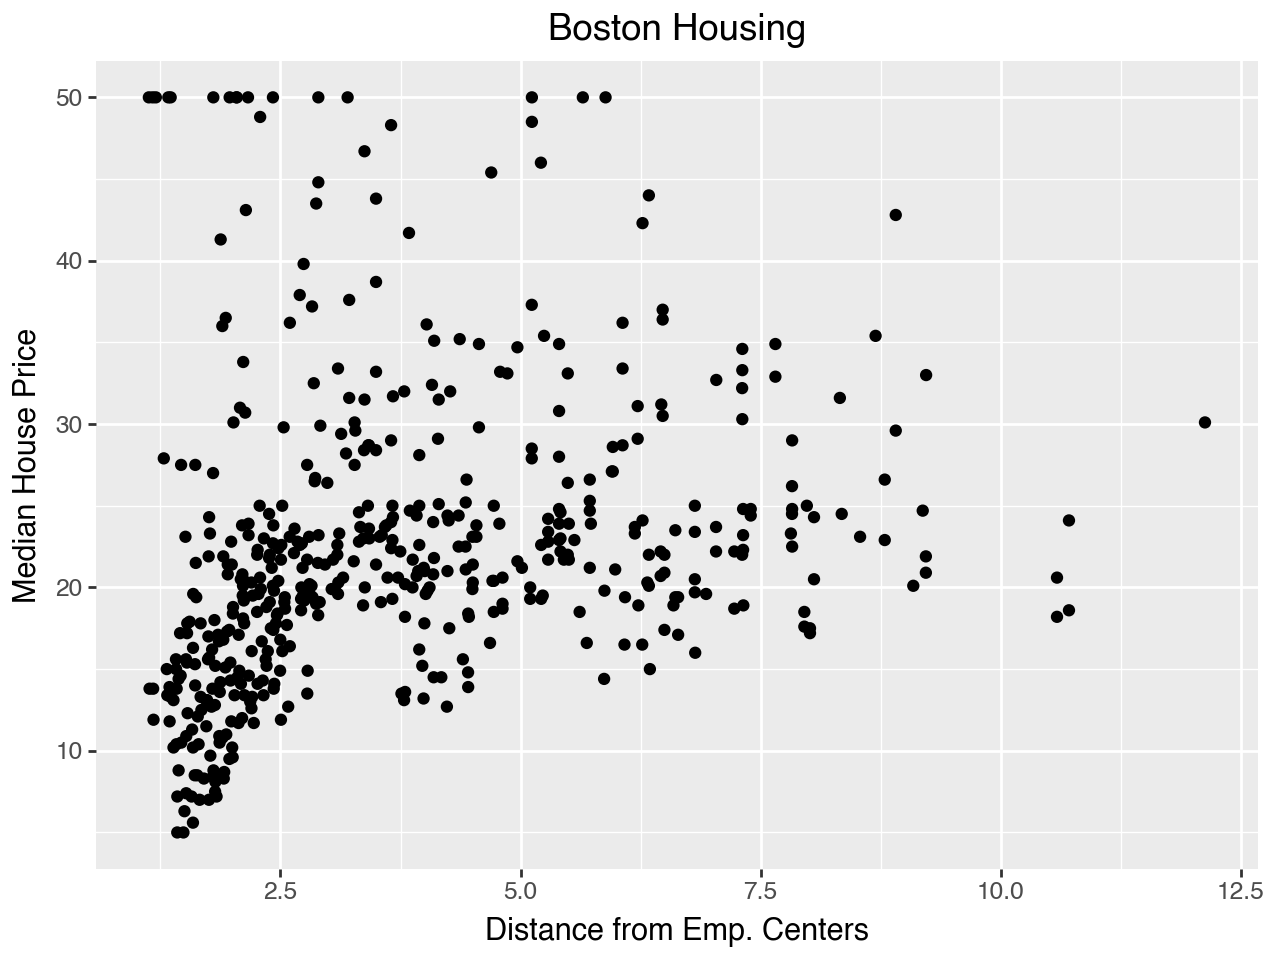

In [104]:
plot_bos = (
    ggplot(boston, aes(x='dis', y='medv')) +
    geom_point() +
    labs(title='Boston Housing', x='Distance from Emp. Centers', y='Median House Price')
)
plot_bos.show()

In [106]:
#fit a model
import statsmodels.formula.api as smf
model = smf.ols('medv ~ dis', boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        16:27:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
dis            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

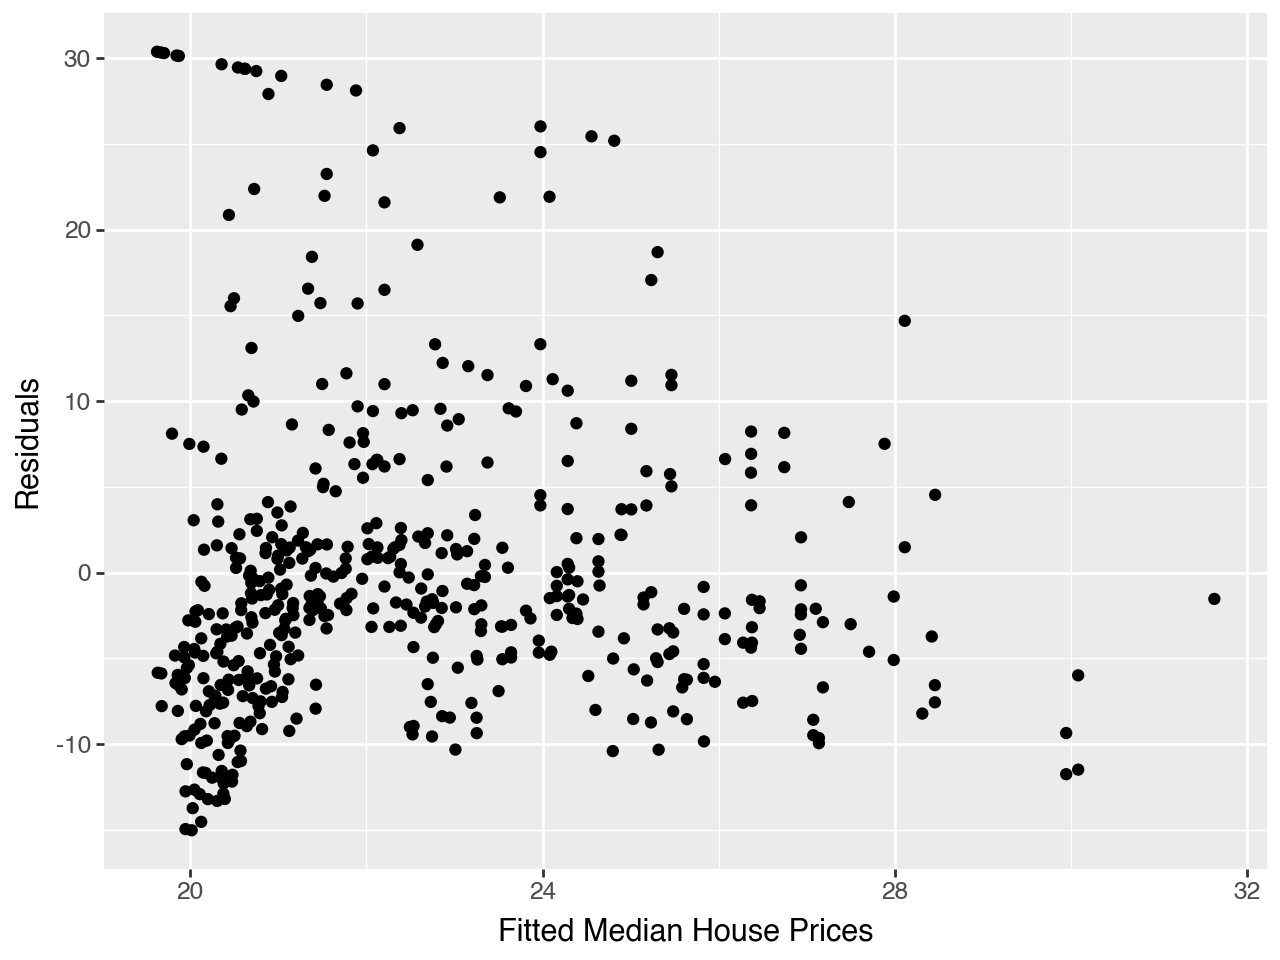

In [108]:
#Fitted Values vs. Residuals
boston.loc[:, 'predicted'] = model.fittedvalues
boston.loc[:, 'residuals'] = model.resid
plot_bos_resid = (
    ggplot(boston, aes(x='predicted', y='residuals')) +
    geom_point() +
    labs( x='Fitted Median House Prices', y='Residuals')
)
plot_bos_resid.show()

Questions:

- What model assumptions might be violated and in which way?

Linear relationship? Not sure. Might suggest need to transform data for a better fit.

Constant variance? Might be not. Solution coming up in MLR
indepedence? Maybe

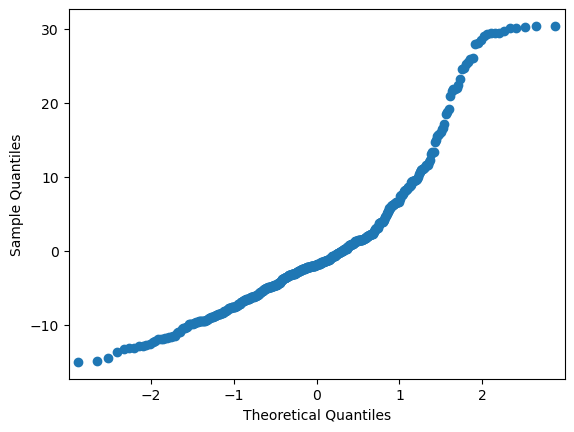

In [111]:
#qq plot
sm.qqplot(model.resid)

<b> Question </b>

What model assumptions might be violated and in which way?

- Normal distribution: seems to follow for smaller values of residuals, but have a heavy right tail.
- Suggesting model is not fitting well for some observations. Might consider a different  model(transformation) for a better fit. 

In [115]:
#quick and dirty transformation, details later
modelnew = smf.ols('np.log(medv) ~ np.log(dis)',boston).fit()

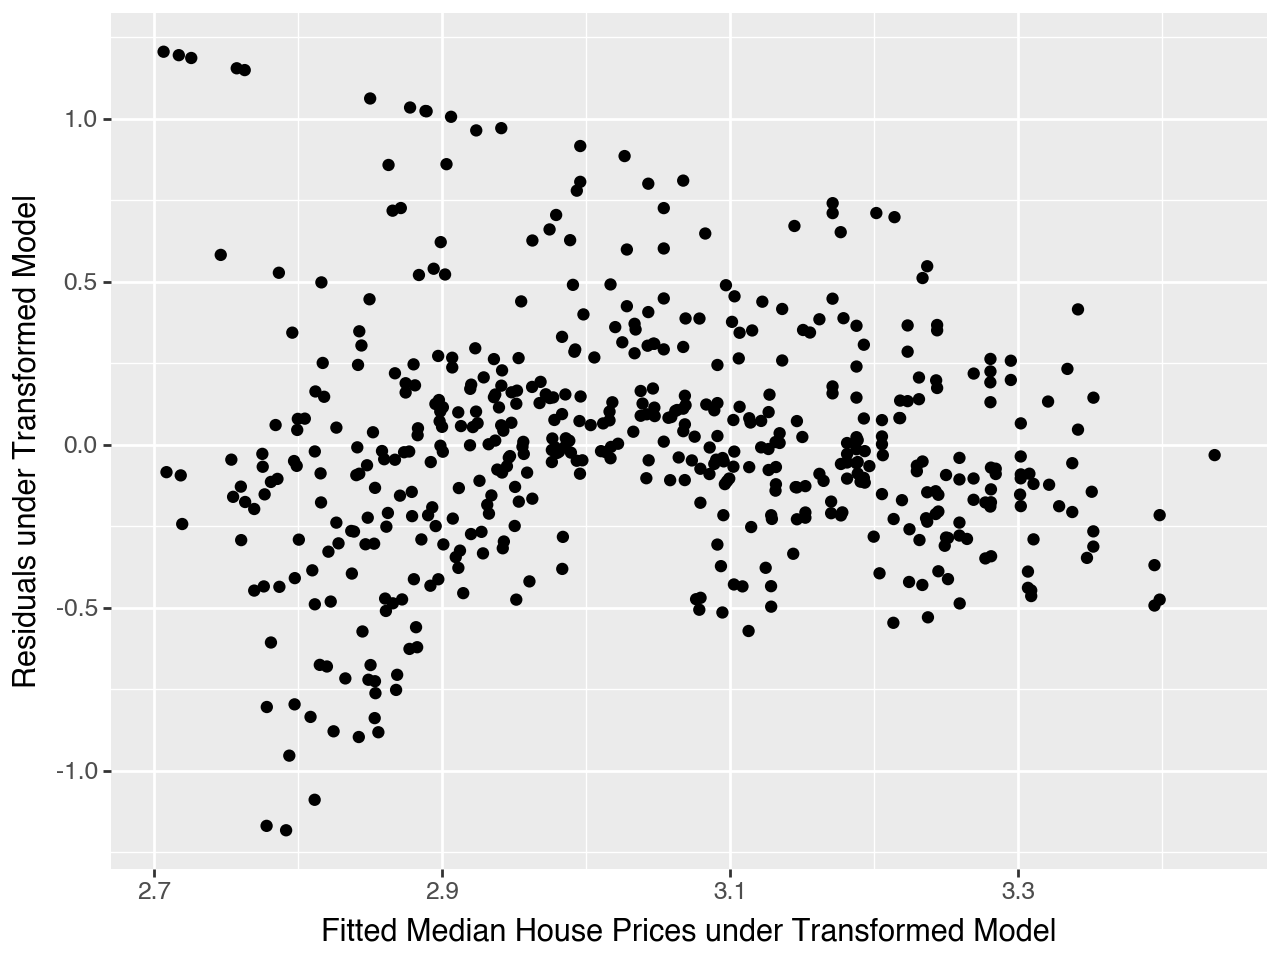

In [117]:
boston.loc[:, 'predicted_trans'] = modelnew.fittedvalues
boston.loc[:, 'residuals_trans'] = modelnew.resid
plot_bos_resid_trans = (
    ggplot(boston, aes(x='predicted_trans', y='residuals_trans')) +
    geom_point() +
    labs( x='Fitted Median House Prices under Transformed Model', y='Residuals under Transformed Model')
)
plot_bos_resid_trans.show()

What is improved?


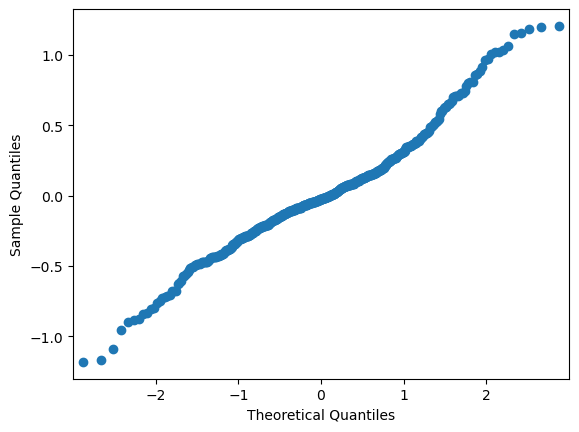

In [120]:
#qq plot
sm.qqplot(modelnew.resid)

### Practice: Credit

- Based on the model you had earlier, check model diagnosis plots, comment on the validation of your model

- What assumptions you think are violated?